# Diffusion

In the _De Rerum Natura_ (Book II) Lucretius (c. 99 – c. 55 BC) attempts to demonstrate the existence of atoms through the observation of the jittering motion of dust particles in the air. He notices their random, unpredictable, _stochastic_ motion: the particles do not move in straight or regular lines, and instead a _chaotic_ movement is observed. This demonstrates, in Lucretius's eyes, the key role pllayed by chaos in the emergence of the world as we know it.

Much later, similar observations on the haphazard motion of pollen and dust in water were made by Scottish botanist Robert Brown in th 19th century, from whom the term of _Brownian motion_ traces its origin.

The description of this _unpredictable_ kind of motion requires to make steps towards a probabilistic physical description. This connects the motion of invidual particles (which can be deterministic) to the motion of collections of particles, which is described statistically. 

For example, a collection of particles can be characterised by their spatial concentration $c=N/V$ as their number $N$ per unit volume $V$. Imagine that we have a monoatomic gas composed of $N$ atoms in the initial volume $V_i$ and that we subsequently expand the volume to the final value $V_f$. The atoms will move, collide, change direction and the atoms will spntaneously occupy all space, in virtue of the second  law of thermodyamnics. But what happenes to their concentration? In the simplest scenario, the atoms wil follow the _diffusion equation_ also known as Fick's second law 

$$\frac{\partial c}{\partial t} = D \nabla^2 c,$$

where $D$ is known as the **diffusion coefficient** and $\nabla^2$ is the Laplacian operator. This equation can be derived using a simple model: *Brownian motion*. 

## Discrete random walk

### One-dimensional case 

A grain of pollen immersed in a fluid like air can be thought as a large particle constantly hit by many much smaller particles that travel rapidly in all directions. At every collision, they exchange momentum with the larger particle, changing its direction of motion.

The simplest possible model for this kind of movement is discrete Brownian motion.  Imagine to have a particle at position $x=0$ and to discretize time by timesteps $\Delta t$. At every step, the particle can move left or right with equal probability and travels a fixed distance $l$. 

Hence:
$$x_{t+\Delta t} = x_{t}+l \xi_t,$$
where $\xi_t$ is a random variable with zero average $\langle \xi_t\rangle=0$ and unit variance $\langle \xi_t \xi_{t\prime}\rangle=1$.

It is very easy too simulate this process in Python using just `numpy`. 

Here we simulate a collection of `nwalkers` evolving for `nsteps` of duration $\Delta t =1$ with step size $l=1$ all starting from $x=0$.

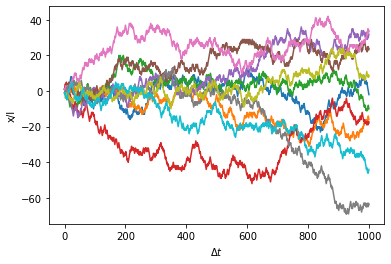

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def walks1d(nsteps = 1000,nwalkers = 10000):
    """Generate nwalkers random walks from x=0 evolving for nsteps."""
    steps = np.random.randint(0,2,size=(nsteps,nwalkers))*2-1 # we generate an (nsteps x nwalkers) table of -1 or 1 values
    return steps.cumsum(axis=0) # we sum the table along the nsteps axis
collection = walks()
plt.plot(collection[:,:10]) #plot only first 10 paths
plt.xlabel(r"$\Delta t$"), plt.ylabel("x/l");

As we have a **collection** of walks we can compute statistical descriptors. 

##### Average position and standard deviation
During the evolution, the walkers get farther and farther from the original position at x=0. Their distribution becomes more and more spread out. A simple way to characterise the spreading of the distribution is to measure its first and second moments:
- the average position $\mu(t)\langle x\rangle(t)$
- the standard deviation of the position $\sigma(t) = \sqrt{\langle x^2\rangle}(t)$

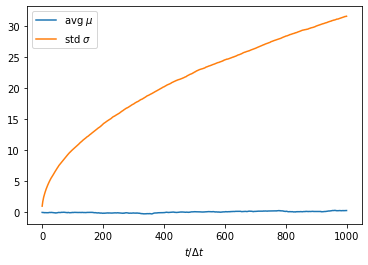

In [ ]:
mu = collection.mean(axis=1)
sigma = np.sqrt((collection**2).mean(axis=1))
plt.plot(mu, label = "avg $\mu$")
plt.plot(sigma,label = "std $\sigma$")
plt.legend(),plt.xlabel("$t/\Delta t$");

Clearly, the average position fluctuates around zero compared to the characteristic standard deviation.  

It is interesting to look at the second moment more closely. The plot above suggests a parabolic relationship between $\sigma$ and time, $$\sigma \propto \sqrt{t}.$$

This can be tested using a **double logarithmic plot**.

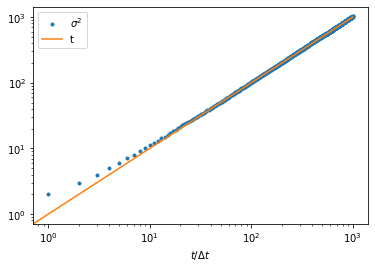

In [ ]:
t = np.arange(len(sigma))
plt.loglog(t,sigma**2,'.',label="$\sigma^2$")
plt.loglog(t,t, label="t"),plt.xlabel("$t/\Delta t$"), plt.legend();

Thi is a characteristic of diffusive, Brownian motion. $\sigma^2(t)=\langle x^2\rangle(t)=\langle [x(t)-x(0)]^2\rangle$ is the **mean squared displacement (MSD)**  and it scales like

$$MSD (t)=\sigma^2 = \frac{l^2}{\Delta t} t$$

We define $D=\frac{l^2}{2\Delta t}$ as the **diffusion coefficient** so that -- in this one-dimensional problem -- we have

$$MSD(t)=2D t$$

Therefore a simple linear fit of the MSD allows us to retrieve the diffusion coefficient numerically:

In [ ]:
fit = np.polyfit(t,sigma**2,1)
print(fit[0])

1.0207794404898407


which is compatible with the expected value of $D=1/2$.

We have seen that the first moment is approximately zero and the second is proportional to time. What about higher moments? The entire **displacement distribution** $G(x,t)$ at a the final time is



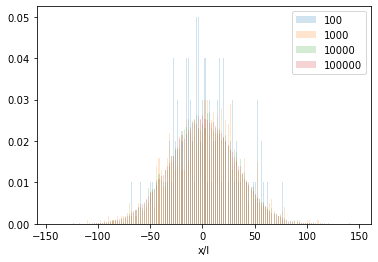

In [ ]:
for nwalkers in [100,1000,10000,100000]:
    w=walks1d(1000,nwalkers)
    plt.hist(w[-1,:],bins=np.arange(w.min(),w.max()+1),density=True,label=f"{nwalkers}",alpha=0.2)
plt.legend()
plt.xlabel("x/l");

With increasing the number of walkers the histogram convergess to a shape that is reminiscent of a Gaussian distribution. Can we numerically test this?

If the displacement distribution $G(x,t)$ has a Gaussian form, the only non-zero parameter is the variance and higher order moments cna be determined from it. In one dimension, one can for example test the **kurtosis** $\kappa = \langle x^4\rangle/\langle x^2\rangle$. For a Gaussian distribution this is $\kappa=3$. 

So, in one dimension, we can define a **non-Gausssian** parameter $\alpha$

$$\alpha_2 = \frac{\langle x^4\rangle}{3\langle x^2\rangle}-1,$$

measuring deviations from Gaussian behaviour:

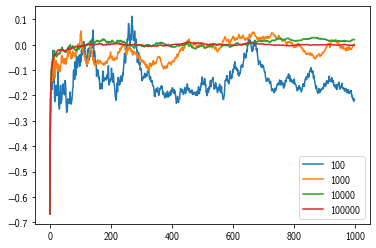

In [ ]:
for nwalkers in [100,1000,10000,100000]:
    w=walks1d(1000,nwalkers)
    alpha = (w**4).mean(axis=1)/((w**2).mean(axis=1)**2)/3-1
    plt.plot(alpha,label=f"{nwalkers}")
plt.ylabel("$\alpha_2$")
plt.legend();

With increasing the numeber of samples, convergence to a Gaussian is ensured. Hence, we conclude that the distribution of displacements takes the form

$$ G(x,t)\approx2\mathcal{N}(0,\sigma^2) = \frac{2}{\sqrt{2 \pi l^{2}t /\Delta t}} \exp \left(-\frac{x^{2} \Delta t }{ 2 l^{2}t}\right) $$

where $\mathcal{N}(m,s^2)$ is the normal distirbution with mean $m$  and standard deviation $s$ and the factor 2 takes into account the fact that only even (odd) bins can be filled for even (odd) $t$. 

This probability distributioon we be rewritten using the diffusion  coefficient $D$ as 

$$ G(x,t)\approx\frac{2}{\sqrt{4 \pi Dt}} \exp \left(-\frac{x^{2} }{ 4D t}\right) $$

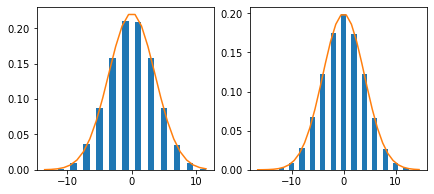

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(7,3))
tf=[13,16]
for i,tfinal in enumerate(tf):
    w=walks1d(tfinal,100000)
    x=np.arange(w.min(), w.max())-0.5
    ax[i].hist(w[-1,:],bins=x, density =True);
    g =2/np.sqrt(2*np.pi*tfinal)*np.exp(-x**2/(2*tfinal))
    ax[i].plot(x,g)

### Two and higher dimensional case

The generalisation of random walks to highher dimensions is straightforward.

For example in two dimensions:

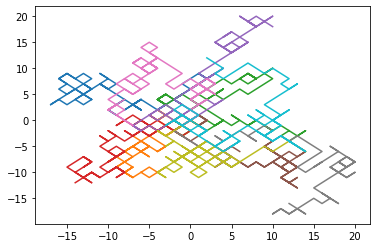

In [ ]:
def walks2d(nsteps = 10000,nwalkers = 10000):
    """Generate nwalkers random walks from x=0 evolving for nsteps."""
    steps = np.random.randint(0,2,size=(nsteps,2,nwalkers))*2-1 
    return steps.cumsum(axis=0) # 

nsteps=100
nwalkers=50000
w2 = walks2d(nsteps,nwalkers)
plt.plot(w2[:,0,:10],w2[:,1,:10]);

And in three:

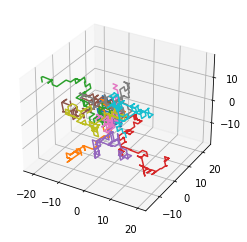

In [ ]:
def walks3d(nsteps = 10000,nwalkers = 10000):
    """Generate nwalkers random walks from x=0 evolving for nsteps."""
    steps = np.random.randint(0,2,size=(nsteps,3,nwalkers))*2-1 
    return steps.cumsum(axis=0) 

w3 = walks3d(nsteps,nwalkers)
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))

for i in range(10): ax.plot(w3[:,0,i],w3[:,1,i],w3[:,2,i]);



Note how the scaling of the MSD with time changes:



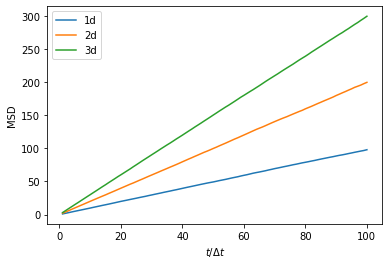

In [ ]:
w1 = walks1d(nsteps,nwalkers)
msd1d = (w1**2).mean(axis=-1)
msd2d = ((w2**2).sum(1)).mean(axis=-1)
msd3d = ((w3**2).sum(1)).mean(axis=-1)
t = np.arange(1,nsteps+1)
plt.plot(t,msd1d,label='1d')
plt.plot(t,msd2d,label='2d')
plt.plot(t,msd3d,label='3d')
plt.ylabel('MSD'),plt.xlabel('$t/\Delta t$'),plt.legend();


A geometrical coefficient varies from dimension to dimension:


In [ ]:
D = 1/2
print("1d:",np.polyfit(t,msd1d,1)[0]/D)
print("2d:",np.polyfit(t,msd2d,1)[0]/D)
print("3d:",np.polyfit(t,msd3d,1)[0]/D)

1d: 1.963671083588359
2d: 3.99682472439244
3d: 5.974177426702672


Indeed, the true scaling is 

$$MSD = (2d)\cdot D \cdot t$$

This can be easily derived from the observation that a random walk in $d$ dimensions is the composition of $d$ independent random walks. For each component $x_i$ we have that

$$P(x_i\sim \mathcal{N}(0,\sigma)$$

Hence

$$\langle x_1^2+x_2^2+...+x_d^2\rangle = \sum_{i=1}^{d} \langle x_i\rangle=d\sigma^2=d \cdot (2D) \cdot t$$

## Langevin equation 

## Diffusion in liquids